In [6]:
# Importing the data with pandas
from matplotlib import pyplot as plt
import seaborn as sns

train_labels = pd.read_csv('data/training_set_labels.csv')
train_features = pd.read_csv('data/training_set_features.csv')
test_features = pd.read_csv('data/training_set_features.csv')

In [7]:
# Merging the train target and features
# Dropping columns that
train_set = train_features.merge(train_labels, on="respondent_id")
train_set = train_set.drop(columns=['respondent_id', 
                                    'doctor_recc_seasonal', 
                                    'opinion_seas_vacc_effective', 
                                    'opinion_seas_risk', 
                                    'opinion_seas_sick_from_vacc', 
                                    'seasonal_vaccine'])

In [8]:
# Splitting into target and predictors (X, y)
X = train_set.iloc[:, :-1]
y = train_set.iloc[:, -1]

In [9]:
# Splitting both X and y into train(75%) and test sets(25%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=10151997)

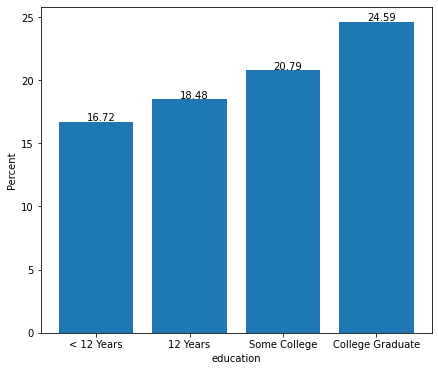

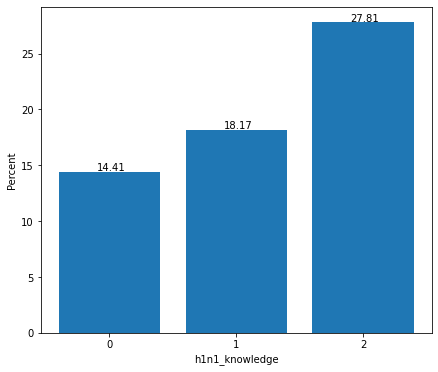

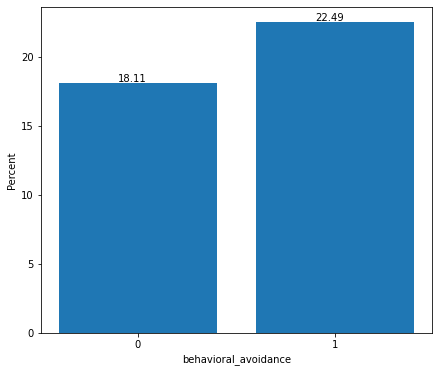

In [10]:
data_graph = train_set.copy()
def plot_ratios(data, column):
  ax = plt.subplots(figsize=(7,6))
  new_df = data.groupby(column)['h1n1_vaccine'].value_counts(normalize=True).sort_values(ascending=True)
  new_df = new_df.mul(100).rename('Percent').reset_index()
  new_df
  x = new_df[new_df['h1n1_vaccine'] == 1][column]
  y = new_df[new_df['h1n1_vaccine'] == 1]['Percent']
  plt.xlabel(column)
  plt.ylabel('Percent')
  plt.xticks(np.arange(0, 4, step=1))
  plt.bar(x=x, height=y, width=0.8)
  for index, value in enumerate(y):
    plt.text(index-0.1,value+0.1, str(round(value,2)));

plot_ratios(data=data_graph, column='education')
plot_ratios(data=data_graph, column='h1n1_knowledge')
plot_ratios(data=data_graph, column='behavioral_avoidance')